<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.07/bds_series_temporales_001_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

 # **<font color="DeepPink">Algunos conceptos previos</font>**

 <p align="justify">
<strong>Nota</strong>: todas las variables con gorrito representan un estimador de una variable teórica. Por ejemplo $\hat{\mu}$ será un estimador para $\mu$ sea lo que sea $\mu$.<br><br>
<strong>Propiedades de la esperanza y la varianza</strong><br><br>
Sean $X$ e $Y$ dos variables aleatorias cualesquiera y $c$ y $d$ dos números reales. Se cumple que: <br><br>
$$ E(a.X + b.Y)=a.E(X)+b.E(Y) $$<br><br>
$$\text{var}(a.X + b.Y) = a^2.\text{var}(X) + b^2 .\text{var}(Y) + 2.a.b.\text{cov}(X,Y) $$<br><br>
Además, si $X$ e $Y$ son variables aleatorias independientes entonces $ \text{cov}(X,Y)=0 $ por lo que se cumple que:<br><br>
$$\text{var}(a.X + b.Y) = a^2.\text{var}(X) + b^2 .\text{var}(Y)  $$<br>
Sea $C$ una constante, $\text{var}(C)=0$.<br><br>
<strong> Ley debil de los grandes números </strong>
<br><br>
Si $X_1,X_2,...,X_n$ son un conjunto de variables aleatorias independientes e identicamente distribuidas con media $\mu$ (como en una muestra aleatoria) entonces a medida que se incrementa $n$, el promedio muestral $\bar{X}$ tiende (en probabilidad) a la media poblacional $\mu$.
<br><br>
A medida que aumenta $n$ el promedio se parece más y más a la media poblacional. La distribución de la V.A. $\bar{X}$ se concentra alrededor de su media que es $\mu$. De esta forma, la distancia (en términos de probabilidad) entre $\bar{X}$ y $\mu$ se va achicando.
<br><br>
<strong> Teorema central del límite </strong>
Si $X_1,X_2,...,X_n$ son un conjunto de variables aleatorias independientes e identicamente distribuidas con media $\mu$ y varianza $\sigma^2$ finita entonces la variable aleatoria:
<br><br>
$$ Z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}} $$
<br>
a medida que aumenta $n$ tiende (en distribución) a una variable aleatoria con distribución $N(0,1)$.
<br><br>
Esta propiedad nos permite hacer cálculos aproximados de probabilidad relativos a $\bar{X}$ con los cuales se pueden testear distintas hipótesis o construir intervalos de confianza.
<br><br>
Estas dos propiedades son ampliamente utilizadas en estadística ya que gran parte de los estimadores que construimos pueden ser interpretados como un "promedio". Ejemplo de ello son los estimadores de Mínimos Cuadrados Ordinarios.

</p>

 # **<font color="DeepPink">Introducción a series de tiempo</font>**

 <p align="justify">
Supongamos que hacemos una encuesta sobre la calidad de servicio que brinda una determinada empresa a un conjunto de clientes de dicha empresa en un momento determinado a 15 clientes distintos y obtenemos los siguientes resultados:<br><br>
$$ [2, 2, 4, 3, 3, 3, 2, 5, 4, 4, 1, 5, 3, 3, 1] $$<br>
donde 1 significa "malo", 2 "regular", 3 "bueno", 4 "muy bueno" y 5 "excelente".<br><br>
En este caso, el orden de los datos no significa nada. Si tuvieramos que dar un parámetro de calidad del servicio de la empresa o si tuvieramos que predecir que diría el cliente encuestado número 16 la respuesta sería el promedio (o la mediana) de los datos.


</p>

In [ ]:
encuesta = [2, 2, 4, 3, 3, 3, 2, 5, 4, 4, 1, 5, 3, 3, 1]
np.mean(encuesta), np.median(encuesta)

(3.0, 3.0)

 <p align="justify">
Si los datos hubiesen sido presentados en un orden distinto, nuestra respuesta no debería cambiar, puesto que el orden en el que estos datos no guarda ninguna información especial.<br><br>
Ahora imaginemos que en lugar de hacer una encuesta a 15 clientes en un momento en el tiempo dado, encuestamos a un cliente elegido en forma aleatoria el último día de cada mes (que haya consumido el servicio ese día) durante 15 meses y obtenemos los siguientes resultados:<br><br>
$$ [1,1,2,2,2,3,3,3,3,3,4,4,4,5,5] $$<br>
Graficamente:


 </p>

Text(0, 0.5, 'Calidad')

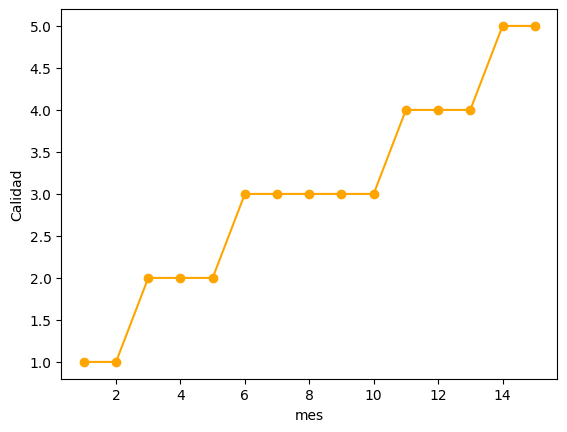

In [ ]:
t = np.linspace(1,15,15)
serie = [1,1,2,2,2,3,3,3,3,3,4,4,4,5,5]
plt.plot(t,serie, "-o", color="orange")
plt.xlabel('mes')
plt.ylabel('Calidad')

 <p align="justify">
Notemos que los datos toman los mismo valores, pero si ahora tuvieramos que predecir cuál sería el resultado de la encuenta del cliente en el mes 16 ¿seguiriamos diciendo 3?<br><br>
La caracteristica esencial de las series de tiempo es que podemos extraer información de su orden.<br><br>

</p>

 <p align="justify">
Este sencillo ejemplo ilustra un hecho fundamental, $N$ datos observados provenientes de una serie de tiempo no es la realización de $1$ muestra aleatoria de tamaño $N$ proveniente de una única población. Son $N$ muestras de tamaño $1$ de $N$ poblaciones distintas pero relacionadas de algún modo (en general identificamos la población con su función de distribucion).<br><br>
<strong>Definición</strong><br><br>
Una serie de tiempo es una sucesión $\{ Z_t \}$ de variables aleatorias cuya función de de distribución podriamos considerarla:<br><br>
$$ F_{Z_{t}}(z) = F_Z(z,t) $$<br>
Esto último quiere decir que la función de distribución de, por ejemplo, la variable aleatoria $Z_1$ no es igual a la función de distribución de la variable $Z_2$. No obstante, en el análisis de series de tiempo suponemos que la distrubicón entre todas las variables aleatorias que componen la series de tiempo se relacionan de alguna manera.<br><br>
La idea general sería descubrir como varía la función de distribución con el tiempo en base a los valores ya realizados de la serie de tiempo. De esta forma, podemos determinar la distribución de probabilidades de la variable $Z_{t+1}$ mediante los valores observados de las variables $Z_t, Z_{t-1}, Z_{t-2},..$ Concretamenten, podemos estar interesados en estimar la función de distribución de probabilidades del Precio del Dolar (al cual llamaremos simplemente Dolar) para septiembre del año 2023 dado que conocemos cual ha sido el comportamiento del dolar en todos los meses anteriores a agosto de 2023.<br><br>
En general, este objetivo es dificil de lograr. Un objetivo más factible, aunque también menos valioso, es brindar un valor esperado de la variable $Z_{t+1}$ dado que conocemos los valores $Z_t, Z_{t-1}, Z_{t-2},..$. Para seguir el mismo ejemplo, queremos dar un valor esperado para el dolar en septiembre de 2023 dado que conocemos toda la serie de valores anteriores.<br><br>
Para lograr estos objetivos deberemos realizar un conjunto de supuestos importantes. Pero antes de ir a ellos, veamos algunas series con las que intentaremos trabajar.


</p>

In [ ]:
#Serie mensual del precio del dolar Blue
#Se toma el valor de venta al cierre de cada mes
#Periodo: diciembre de 2016 a junio de 2023

dolar = [16.87,16.64, 16.28,15.98,15.99,16.36,16.84,18.09,18.23,17.91,18.1,17.96,19.28,19.95,20.35,20.76,21,25.97,29.4,28.45,38,41.3,36.5,38,40.5,37.5,39,43.65,46,46,43.8,45.2,63,61.25,69,69.25,78.5,78,78.5,83.5,118,125,126,136,135,146,169,155,166,155,145,141,150,157,168,180.5,182,186,198,201.5,208.5,212.5,210.5,200,199,206,238,298,290,288,291,314,347,382,375,393,468,490,493]

Text(0, 0.5, 'Precio del dolar')

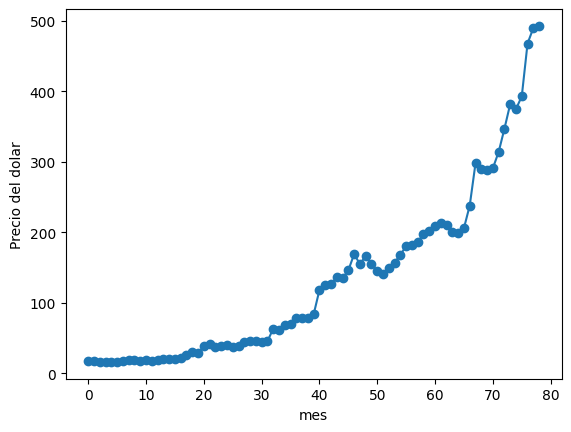

In [ ]:
t = list(range(len(dolar)))
plt.plot(t,dolar, "-o")
plt.xlabel('mes')
plt.ylabel('Precio del dolar')

In [ ]:
#Serie mensual del ïndice de Precios al Consumidor
#Números índices
#Periodo: diciembre de 2016 a junio de 2023

IPC = [1,1.013,1.038325,1.0632448,1.0908892,1.1050707,1.1205417,1.1395909,1.1566848,1.1798185,1.1951561,1.209498,1.2506209,1.2706309,1.3036673,1.3362589,1.3710017,1.3970507,1.4515357,1.4921787,1.553358,1.6558796,1.7403295,1.7907991,1.8409414,1.8924878,1.9644023,2.0586936,2.1245718,2.188309,2.245205,2.2923543,2.3817562,2.519898,2.6005347,2.7071567,2.8100286,2.8634192,2.9149607,3.0198993,3.0621779,3.1081106,3.1702728,3.2209971,3.3111851,3.4038982,3.5264386,3.6322317,3.7666243,3.8909229,4.0309961,4.2406079,4.4144729,4.5645649,4.7060664,4.8519545,4.9781053,5.1672733,5.3636297,5.4869932,5.7119599,5.9347264,6.2077238,6.6236413,7.034307,7.3719537,7.7774112,8.3529396,8.9376454,9.4739041,10.099182,10.604141,11.16616,11.83613,12.629151,13.614224,14.785048,15.967852,16.893987]

Text(0, 0.5, 'IPC')

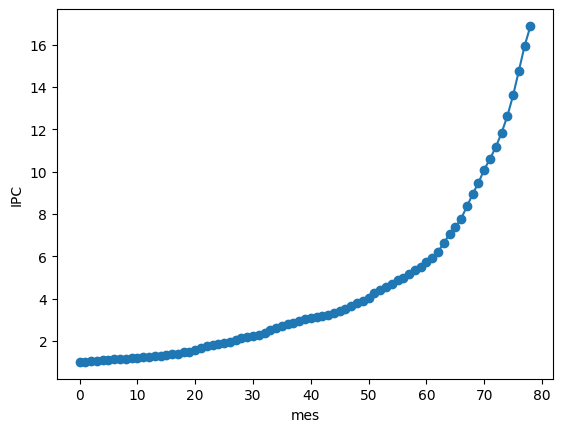

In [ ]:
plt.plot(t,IPC, "-o")
plt.xlabel('mes')
plt.ylabel('IPC')

Construyamos la serie de inflación. Llamando $\pi_t$ al valor que toma la variación porcentual de precios en el momento $t$, tenemos que:<br><br>
$$ \pi_t = \frac{IPC_t - IPC_{t-1}}{IPC_{t-1}} $$<br>
Aunque es posible lograr un resultado casi identico mediante la siguiente expresión:<br><br>
$$ \pi_t = \text{ln}(IPC_t) - \text{ln}(IPC_{t-1}) $$<br>
Esta es la formulación que usaremos.

Text(0, 0.5, 'Inflación')

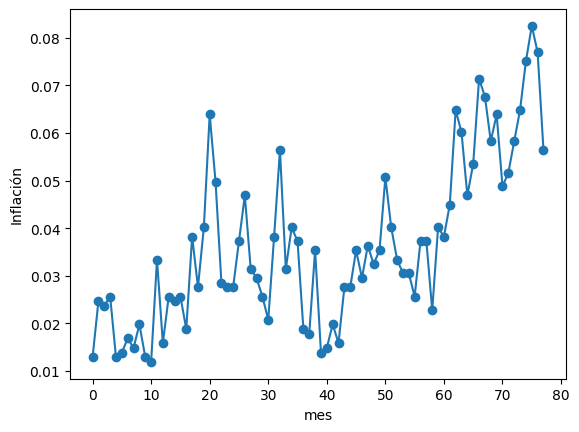

In [ ]:
#Serie mensual de inflación
#variaciones porcentuales del IPC
#Periodo: enero 2017 a junio de 2023
#Perdemos un dato porque no podemos calcular la inflación para diciembre de 2016 al no contar con el dato de noviembre de 2016

inf = []
for i in range(len(IPC)-1):
  inf_i = np.log(IPC[i+1]) - np.log(IPC[i])
  inf.append(inf_i)

t2 = list(range(len(inf)))
plt.plot(t2,inf, "-o")
plt.xlabel('mes')
plt.ylabel('Inflación')

In [ ]:
#Serie trimestral de PBI a precios constantes de 2004
#Periodo: primer trimestre 2004 a primer trimestre 2023
PBI = [460369,514396,481152,484544,493603,581668,514698,522255,532348,614076,562979,572794,576847,674621,610426,625877,616720,711406,647088,613491,578553,631198,610520,615221,611607,733731,668567,668190,662326,766333,711417,703050,672686,730838,703462,706958,677086,776487,721459,706597,671066,760577,690880,686701,672750,791236,718281,703682,677652,760703,694382,693174,681445,778402,721120,724593,707324,747428,696102,678656,665849,751784,683901,671361,632389,609380,614192,642403,654122,723768,687659,700592,691851,773160,727030,711199,701176]

Text(0, 0.5, 'PBI a precios constantes')

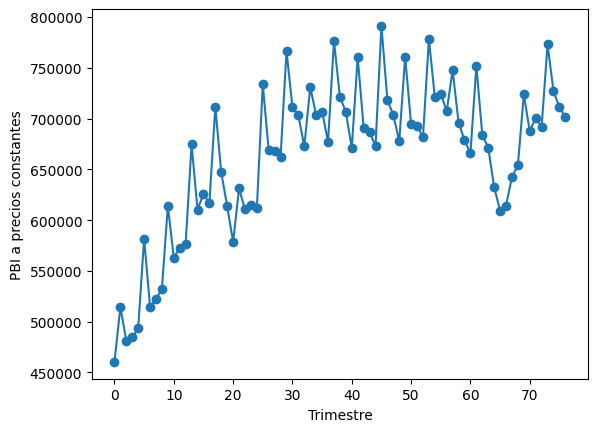

In [ ]:
t3 = list(range(len(PBI)))
plt.plot(t3,PBI, "-o")
plt.xlabel('Trimestre')
plt.ylabel('PBI a precios constantes')

 <p align="justify">
las series anteriores muestran algunos aspectos relevantes de las series de tiempo:<br><br>
*   La serie de IPC parece mostrar una tendencia exponencial creciente (y prácticamente nada más).<br><br>
*   La serie del Dolar también parece mostrar una tendencia exponencial creciente pero con un comportamiento más irregular<br><br>
*   La serie de PBI parece mostrar una tendencia creciente pero que se va estancando sobre el final. Además, podemos ver que dentro de un mismo año el PBI es siempre más alto en el segundo trimestre. Finalmente, a simple vista la serie muestra un comportamiento más errático que las anteriores.<br><br>
Formalizando estas ideas, vamos a suponer que una serie de tiempo $\{ Z_t \}$ se genera siguiendo un <strong>proceso</strong> como el siguiente:<br><br>
$$ Z_t = \mu + M_t + S_t + X_t $$<br>
donde:<br><br>
*   $\mu$ es una constante.<br><br>
*   $M_t$ es una función del tiempo, $t$, que representa la tendencia temporal de la serie. Por ejemplo:<br><br>
Tendencia lineal: $M_t = a t$ donde $a$ es una constante.<br>
Tendencia cuadrática: $M_t = a t^2 + bt$ donde $a$ y $b$ son constantes.<br>
Tendencia exponencial: $M_t = a e^{bt}$ donde $a$ y $b$ son constantes.<br>
etc.<br><br>
En general, la constante $\mu$ se suele considerar parte de la función tendencia.<br><br>
*   $S_t$ es una función del tiempo cíclica que representa una componente que llamamos estacional. El ejemplo más común del comportamiento estacional está representado por la venta de helados por parte de una heladería. Es de esperar que una heladería venda más en los meses de verano, menos en los meses de invierno y algo intermedio en los meses de otoño y primavera.<br><br>
Ejemplo para una serie trimestral como la de venta de helados:<br><br>
$$ S_t = \begin{cases} 10 \quad \text{ } \text{ } \text{ si} \quad t=1,5,9,... \\ 0 \quad \text{ } \text{ } \text{ } \text{ } \text{ si} \quad t=2,6,10,... \\ -10 \quad \text{si} \quad t=3,7,11,... \\ 0 \quad \text{ } \text{ } \text{ } \text{ } \text{ si} \quad t=4,8,12,... \end{cases}  $$<br><br>
Graficamente:

</p>

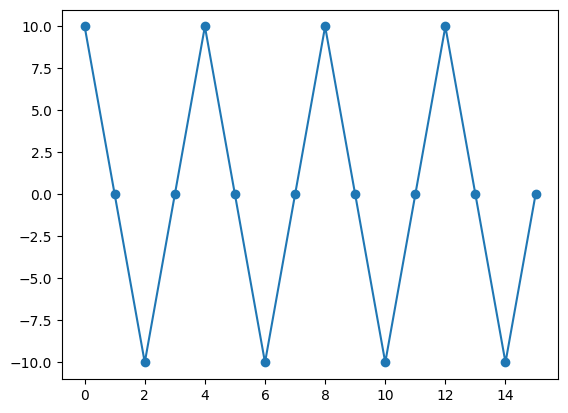

In [ ]:
St = 4*[10,0,-10,0]
t = list(range(len(St)))
plt.plot(t,St,'-o')

 <p align="justify">
*   $X_t$ es una componente puramente aleatoria cuya función de distribución depende de $t$.<br><br>
Si logramos identificar y estimar adecuadamente las distintas partes que forman la serie entonces podemos estimar como evolucionará la serie en el futuro dado que conocemos su historia previa. Concretamente, el valor esperado de la realización en el momento $t+1$ de la serie dado que sabemos que ha ocurrido hasta el momento $t$ viene dado por:<br><br>
$$ E_t[Z_{t+1}] = \mu + E_t[M_{t+1}] + E_{t}[S_{t+1}] + E_{t}[X_{t+1}] \\ = \mu + M_{t+1} + S_{t+1} + E_{t}[X_{t+1}] $$<br>
En la ecuación anterior $E_{t}[Z_{t+1}]$ representa el valor esperado de la variable $Z_{t+1}$ condicionada a todo lo que conocemos hasta el momento $t$ de la sucesión $\{ Z_t \}$, la cual no tiene por que ser igual a $E[Z_{t+1}]$, que es la esperanza incondicional de $Z_{t+1}$. Veremos ejemplos de esta diferencia cuando estudiemos los procesos $AR(1)$ y $MA(1)$.


</p>

 # **<font color="DeepPink">Estimadores para el estudio de series de tiempo</font>**

 <p align="justify">
Para poder determinar la estructura de una serie de tiempo se utilizan 4 estimadores.<br><br>
<strong>Media muestral</strong><br><br>
Dado que contamos con una realización de $T$ valores de una serie de tiempo $Z_t$, podríamos pensar en estimar la media del proceso mediante:<br><br>
$$ \bar{Z} = \frac{1}{T} \sum_{t=1}^{T}Z_t $$<br>
Este estadístico será un estimador consistente de la media del proceso solo si dicho proceso es estacionario (lo veremos más adelante). Basta decir que no siempre será un estimador consistente aunque lo necesitamos para realizar otras estimaciones.<br><br>
<strong>La función de autocovarianzas muestral</strong><br><br>
Dada una serie de tiempo, estamos interesados en conocer:<br><br>
1.   La varianza del proceso.<br>
2.   La covarianza entre la variable aleatoria $Z_t$ y la variable aleatoria $Z_{t+k}$ para todo posible valor $k$<br><br>
La función de autocovarianzas muestral, $\hat{\gamma}_k$ nos permite expresar todo esto mediante una única formulación:<br><br>
$$ \hat{\gamma}_k = \frac{1}{T} \sum_{t=1}^{T-k}(Z_t - \bar{Z})(Z_{t+k} - \bar{Z}) $$<br>
Notemos que cuando $k=0$ obtenemos la misma expresión de la cuasi-varianza muestra vista en el módulo de Estadística. Es decir que $\hat{\gamma}_0$ es un estimador de la varianza del proceso. <br><br>
Una vez más, $\hat{\gamma}_k$ será un estimador consistente (pero sesgado) para la verdadera covarianza entre $Z_t$ y $Z_{t+k}$ solo si el proceso estudiado es estacionario.<br><br>
<strong>La función de autocorrelación muestral</strong><br><br>
Los estimadores anteriores nos permiten construir uno de los principales indicadores que se utilizan para el estudio de series de tiempo, la función de autocorrelación muestral, $\hat{\rho}_k$, la cual se define según la siguiente expresión:<br><br>
$$ \hat{\rho}_k = \frac{\hat{\gamma}_k}{\hat{\gamma}_0}=\frac{\sum_{t=1}^{T-k}(Z_t - \bar{Z})(Z_{t+k} - \bar{Z})}{\sum_{t=1}^{T}(Z_t - \bar{Z})^2} $$<br>
Este estimador no es distinto de una correlación normal vista en estadística. <br><br>










</p>

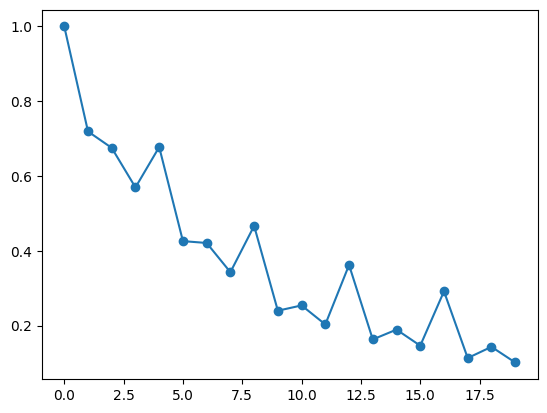

In [ ]:
#Calculemos la correlación entre PBI_t y PBI_{t+1}
PBI_mean = np.mean(PBI)
gamma0 = sum((np.array(PBI)-PBI_mean)**2)/len(PBI)

K = 20
gammak=[]

for k in range(K):
  PBIgamma = []
  for i in range(len(PBI)-k):
    PBIgamma.append((PBI[i] - PBI_mean)*(PBI[i+k] - PBI_mean))
    cov = sum(np.array(PBIgamma))/len(PBI)
  gammak.append(cov)

pk =np.array(gammak)/gamma0
plt.plot(range(K), pk, '-o')

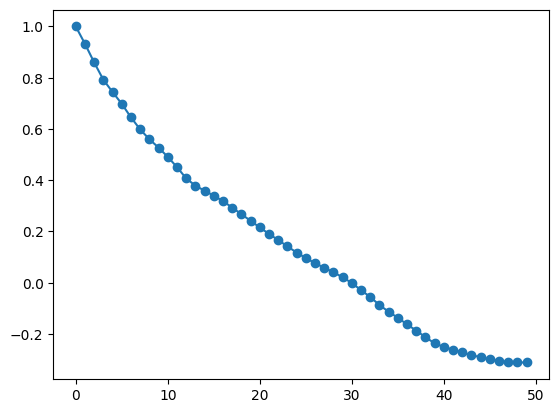

In [ ]:
#Calculemos la correlación entre dolar_t y dolar_{t+1}
dolar_mean = np.mean(dolar)
gamma0 = sum((np.array(dolar)-dolar_mean)**2)/len(dolar)

K = 50
gammak=[]

for k in range(K):
  dolargamma = []
  for i in range(len(dolar)-k):
    dolargamma.append((dolar[i] - dolar_mean)*(dolar[i+k] - dolar_mean))
    cov = sum(np.array(dolargamma))/len(dolar)
  gammak.append(cov)

pk =np.array(gammak)/gamma0
plt.plot(range(K), pk, '-o')

 <p align="justify">
<strong>La función de autocorrelación parcial muestral</strong><br><br>
En el estudio de series de tiempo existe una consideración adicional respecto de la correlación. Supongamos que la variable aleatoria $Z_t$ está fuertemente correlacionada con $Z_{t+1}$ y $Z_{t+2}$ (como vemos en lo gráficos anteriores). En pricipio la correlación entre $Z_{t}$ y $Z_{t+1}$ es la misma que existe entre $Z_{t+1}$ y $Z_{t+2}$ (al menos su estimador es el mismo).<br><br> Esto implica que cuando calculamos la correlación existente entre $Z_t$ y $Z_{t+2}$ la misma está influida por la correlación que existe entre  $Z_t$ y $Z_{t+1}$ y entre $Z_{t+1}$ y $Z_{t+2}$.<br><br>
La idea entonces es estimar la correlación entre $Z_t$ y $Z_{t+2}$ limpia de la influencia de $Z_{t+1}$. Para poder encontrar esta relación podemos hacer lo siguiente:<br><br>
1.   Correr las siguientes regresiones lineales:<br><br>
$$ Z_t = \alpha_1 Z_{t+1} + \epsilon^{1} \\  Z_{t+2} = \alpha_2 Z_{t+1} + \epsilon^{2}. $$<br>
2.   Obtener los estimadores $\hat{\alpha_1}$ y $\hat{\alpha_2}$.<br><br>
3.   Construir las nuevas variables:<br><br>
$$ Z^{*}_{t} = Z_{t} - \hat{\alpha_1}Z_{t+1} \\ Z^{*}_{t+2} = Z_{t+2} - \hat{\alpha_2}Z_{t+1} $$<br>
4. Se estima la correlación parcial entre $Z_t$ y $Z_{t+2}$, la cual llamamos $\hat{\pi}_2$, mediante la correlación entre $Z^{*}_t$ y $Z^{*}_{t+2}$.<br><br>
Consideraciones:<br><br>
1. Dado que entre $Z_t$ y $Z_{t+1}$ no existen variables intermedias, se cumple que $\hat{\pi}_1 = \hat{\rho}_1$ (la correlación muestral y la correlación parcial muestral son iguales).<br><br>
2. Para estimar la correlación parcial entre $Z_t$ y $Z_{t+k}$ debemos limpiar ambas variables de la influencia lineal de las $k-2$ variables aleatorias intermedias (posiblemente mediante un proceso similar al anterior).<br><br>
3. El método propuesto es muy ilustrativo de la idea de correlación parcial, pero no es el utilizado para hacer cálculos.<br><br>
Existen otros métodos para estimar las correlaciones parciales. El método de Yule - Walker funciona de manera recursiva, aunque la forma actual más utilizada para estimar la correlación parcial entre $Z_t$ y $Z_{t+k}$ regresar $Z_t$ en las variables $Z_{t+1}$, $Z_{t+1}$, $Z_{t+2}$,...,$Z_{t+k}$. El coeficiente estimado de la variable $Z_{t+k}$ es el estimador de la correlación parcial deseada.<br><br>
Es muy útil graficar las funciones de autocorrelación muestral y autocorrelación parcial muestral con sus intervalos de confianza.

</p>

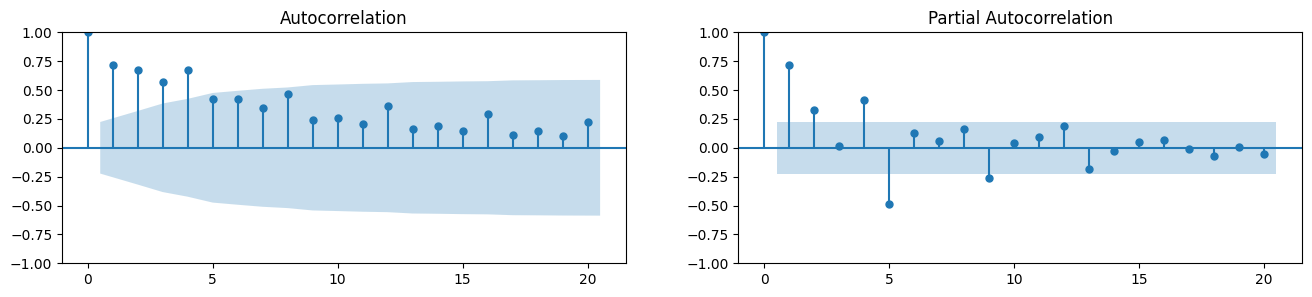

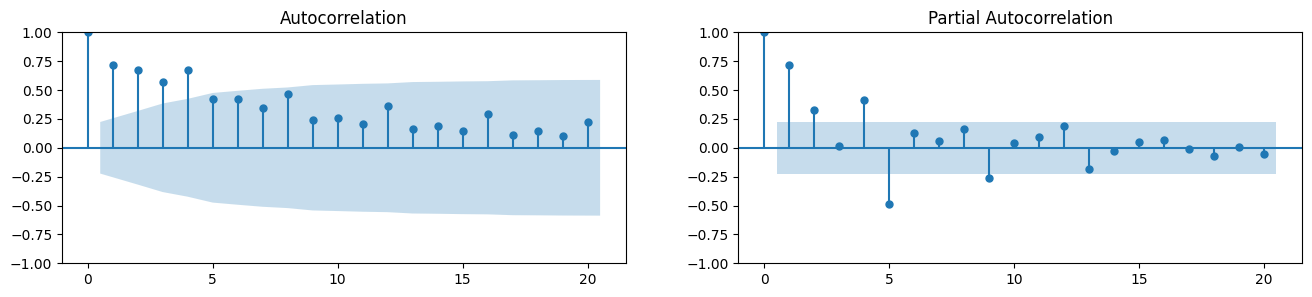

In [ ]:
#Graficamos las funciones de autocorrelacion (acf) y autocorrelación parcial (pacf).
# Los valores fuera de la zona azul son significativamente distintos de 0.

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(PBI, lags=20, ax=axes[0])
plot_pacf(PBI, lags=20, ax=axes[1])

In [ ]:
acf(PBI),pacf(PBI)

(array([1.        , 0.71925932, 0.67529292, 0.56966676, 0.67757669,
        0.42604035, 0.4210982 , 0.34298504, 0.46673713, 0.23996877,
        0.25412868, 0.20321758, 0.362256  , 0.16314838, 0.18941988,
        0.1464664 , 0.29178851, 0.11337463, 0.1433869 ]),
 array([ 1.        ,  0.72872326,  0.34600459,  0.02472113,  0.45457747,
        -0.54931074,  0.18201144,  0.04779579,  0.20491264, -0.36399067,
         0.12588803,  0.08004492,  0.31801556, -0.41334742,  0.15940293,
        -0.08027593,  0.35303372, -0.43089427,  0.33664651]))

 # **<font color="DeepPink">Series estacionarias</font>**

 <p align="justify">
<strong>Definición</strong><br><br>
La serie de tiempo $\{ Z_t \}$ es estacionaria (en sentido debil) si cumple que:<br><br>
1.  $E(Z_t) = \mu$ para todo $t$. <br><br>
2.  $\text{cov}(Z_t;Z_{t+k}) = \gamma_k < \infty$ para todo $t$ y $t + k$ <br><br>
Para que un serie sea estacionaria su esperanza (no condicionada) debe ser constantes, y la covarianza (verdadera) entre $Z_{t}$ y $Z_{t+k}$ debe depender unicamente de la distancia temporal entre las variables. Por ejemplo, se debe cumplir que $\text{cov}(Z_4;Z_{10}) = (Z_8;Z_{12})$.<br><br>
Particularmente, la condición 2 establece que la varianza de la serie (no  condicionada), $\gamma_0$, también es constante a lo largo del tiempo.<br><br>
La condición 2 no podemos comprobarla directamente mediante la función de autocovarianza muestral puesto que esta última siempre toma un valor finito. Por este motivo, debemos estudiar como se comportan las funciones de autocorrelación y autocorrelación parcial de forma teórica de los distintos procesos estacionarios para poder identificarlos utilizando las correspondientes funciones muestrales.<br><br>








</p>

 # **<font color="DeepPink">Ruido Blanco ($WN$)</font>**

  <p align="justify">
El primer proceso estacionario que veremos es el Ruido Blanco.<br><br>
<strong>Definición</strong><br><br>
Sea $\{ A_t \}$ una serie de tiempo. Decimos que $A_t$ es Ruido Blanco, o que $A_t \sim WN$ si se cumple que:<br><br>
1. $E(A_t) = 0$ para todo $t$.<br><br>
2. $\gamma_0 = \text{var}(A_t) = \sigma^2_A$ para todo $t$.<br><br>
3. $\text{cov}(A_t; A_{t+k}) = 0$ para todo $k \geq 1$.<br><br>
Los ruidos blancos, son procesos estacionarios particulares en los que la esperanza es $0$ y no existe correlación entre lo que pasa en un momento y otro. La condición 3 implica que la verdadera función de autocorrelación del proceso (la función teórica), $\rho_k$, toma valor $0$ para todo $k>0$ (para $k=0$ se cumple para cualquier serie que $\rho_k = 1$). Los mismo ocurre con la función de autocorrelación parcial teórica del proceso.
Veamos graficamente un proceso de Ruido Blanco.









</p>

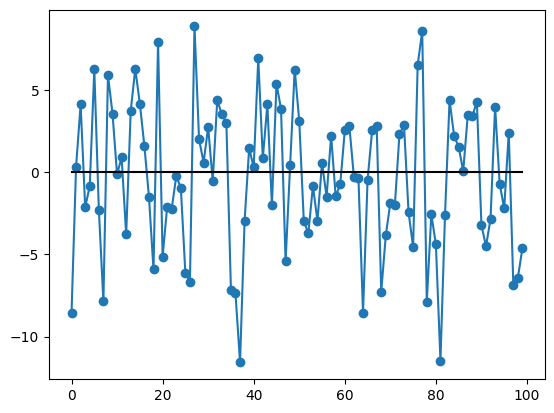

In [ ]:
WN = norm.rvs(0, 4, 100)  #simulamos 100 valores de forma aleatoria
plt.plot(range(len(WN)), WN, '-o')
plt.plot(range(len(WN)), np.linspace(0,0,len(WN)), color='black')

Veamos las gráficas de las funciones de autocorrelación muestral y autocorrelación parcial muestral de un proceso de Ruido Blanco.

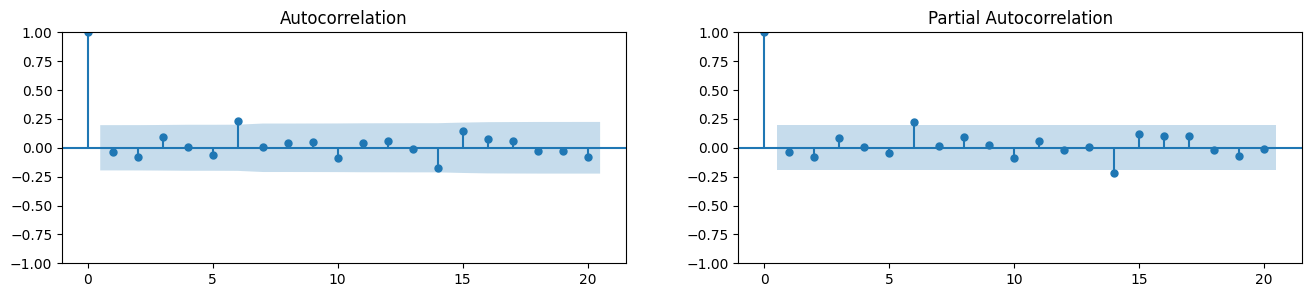

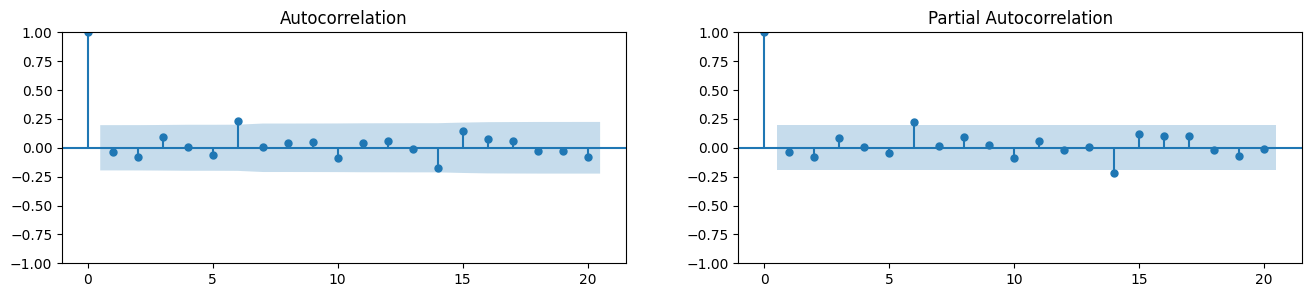

In [ ]:
#Simulamos de nuevo 100 valores aleatorios que conforman un proceso de WN
WN = np.random.randn(100)
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(WN, lags=20, ax=axes[0])
plot_pacf(WN, lags=20, ax=axes[1])

<p align="justify">
Es de esperar que todos los valores de ambas funciones sean <strong>no significativamente distintos de $0$</strong>, salvo el primero. Si $Z_t \sim WN$ entonces al graficar sus funciones de AC. muestral y AC.P muestral todos los valores, salvo el primero de cada una, deberian caer dentro  de región sombreada.<br><br>
En la práctica esto no ocurre, por ese motivo se proponen test que evaluan glabalmente la hipotesis nula:<br><br>
$$ H_0: \rho_2 = \rho_3 = ... =\rho_k = 0$$<br>
El método más conocido viene dado por el test de Ljung-Box. En términos generales, el test se basa en construir promedios de las correlaciones elevadas al cuadrado. En el test de Ljung-Box se construye el estadistico de prueba:<br><br>
$$ Q = T(T-2) \sum_{k=1}^{h} \frac{\hat{\rho_k}^2}{T-k} \to \chi^2_{h} $$<br>
Luego la hipótesis nula se rechaza si $Q$ toma un valor superior al cuantil $0.95$ de una distribución chi-cuadrado con $h$ grados de libertad.



</p>

In [ ]:
#Tener en cuenta que la hipótesis nula no se rechaza si el p_valor es > 0.05
#En principio deberiamos aceptar la hipotesis nula para cualquier cantidad de lags que utilicemos (lag = 1 calcula hasta p_2)
sm.stats.acorr_ljungbox(WN, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,17.902711,0.593817


No se rechaza la hipótesis nula que la serie construida es Ruido Blanco.

Supongamos ahora que tenemos una serie de tiempo $X_t$ cuyo proceso generador de datos es:

$$  X_t = \mu + A_t \quad \text{con} \quad A_t \sim WN \quad \text{y} \quad \mu \text{ constante} $$

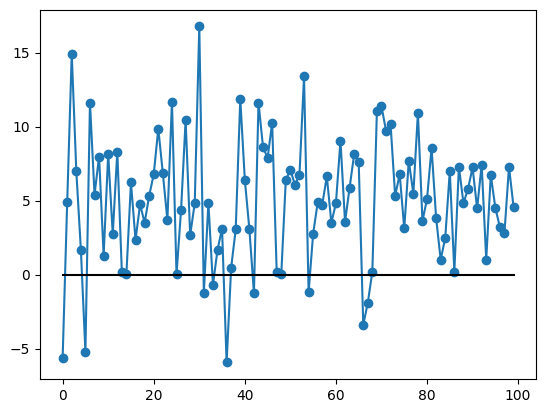

In [ ]:
WN = norm.rvs(0, 4, 100)  #simulamos 100 valores de forma aleatoria
mu = 5
Xt = WN + mu

plt.plot(range(len(Xt)), Xt, '-o')
plt.plot(range(len(Xt)), np.linspace(0,0,len(Xt)), color='black')

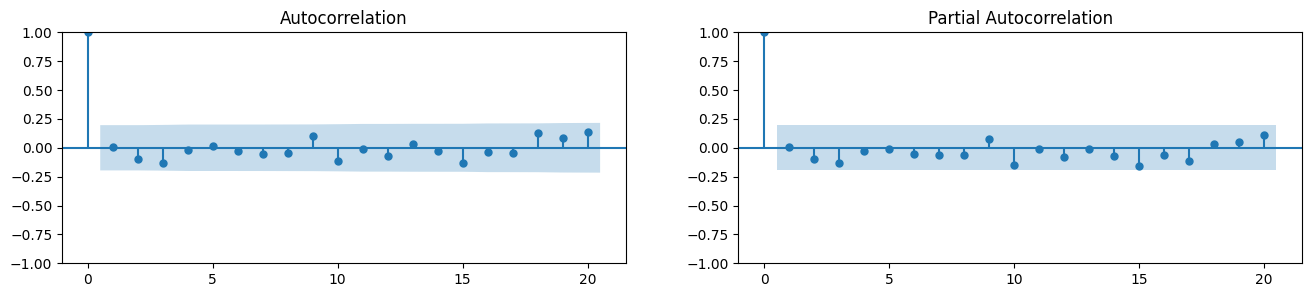

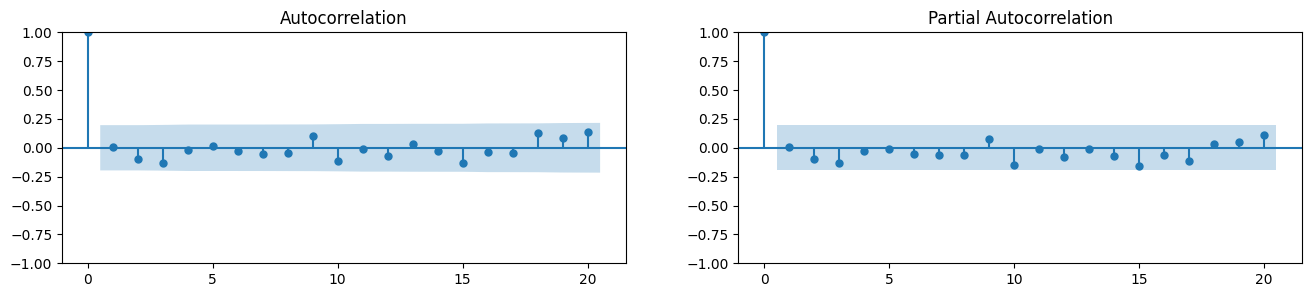

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(Xt, lags=20, ax=axes[0])
plot_pacf(Xt, lags=20, ax=axes[1])

En este caso basta utilizar el promedio de la serie para estimar $\mu$:
$$ \hat{\mu}=\frac{1}{T}\sum_{t=1}^{T}X_t $$

In [ ]:
x_barra = np.mean(Xt)
x_barra

5.02859309010461

<p align="justify">
Ahora, la serie $X_t -\hat{\mu}$ debería seguir un proceso de Ruido Blanco el cual podemos testear con el estadistico de Ljung - Box.<br><br>
De esta forma, para la serie anterior habriamos estimado completamente el proceso que la genera:<br><br>
$$ X_t = 4,98 + A_t \quad \text{con} \quad A_t \sim WN$$<br>
Y con esta estimación podemos predecir cuales serán los valores futuros de la serie dado los varoles conocidos hasta el momento $t$:<br><br>
$$ \hat{X}_{t+1} = E_{t}(X_{t+1})=E_t(4,98 + A_{t+1})=E_t(4,98) + E_t(A_{+1}) = 4,98 $$<br>
De la misma forma: <br>
$$ \hat{X}_{t+2} = 4,98 $$<br>
$$ \hat{X}_{t+h} = 4,98 $$<br>
Y también podemos calcular el error cuadrático medio de nuestras predicciones:<br><br>
$$ \text{ECM}(\hat{X}_{t+k}) = E(\hat{X}_{t+k} - X_{t+k})^2 = E \Big( \mu - (\mu + A_{t+k}) \Big)^2 = \sigma^2_A  $$<br>
En general, para cualquier serie de tiempo queremos estimar las distintas componentes del porceso generador de datos de forma tal que lo que quede sin modelar sea Ruido Blanco.



</p>

 # **<font color="DeepPink">Procesos autorregresivos $(AR)$</font>**

  <p align="justify">
El segundo tipo de procesos estacionarios que vamos a estudiar son los procesos autorregresivos.<br><br>
<strong>Definición</strong><br><br>
Decimos que la serie $Z_t$ sigue un proceso $AR(p)$ si se puede escribir de la forma:<br><br>
$$ Z_t = \mu + \phi_1 Z_{t-1} + \phi_2 Z_{t-2} + ... + \phi_p Z_{t-p} + A_t$$<br>
con $ A_t \sim WN $ y $\phi_1, \phi_2, ..., \phi_p$ números reales con algunas restricciones que iremos estudiando.<br><br>
Empecemos por el proceso $AR(1)$, es decir:<br><br>
$$ Z_t = \mu + \phi Z_{t-1} + A_t $$<br>
Intuitivamente, el proceso $AR(1)$ nos dice que lo que ocurre en el momento $t$ está determinado por lo ocurrido en el momento $t-1$ y por una innovación o shock aleatorio ($A_t$).<br><br>
Notemos que para que este proceso sea estacionario su esperanza (incondicional) debe ser finita.<br><br>
$$ E[Z_t] = \mu + \phi E[Z_{t-1}] \quad \text{ya que} \quad E[A_t]=0 $$<br>
pero a su vez:<br><br>
$$ E[Z_{t-1}] = \mu + \phi E[Z_{t-2}] \quad \text{ya que} \quad E[A_{t-1}]=0 $$<br>
juntando las dos ecuaciones:<br><br>
$$ E[Z_t] = \mu + \phi \mu + \phi^2 E[Z_{t-2}]  $$<br>
Siguendo con este proceso hacia atrás:<br><br>
$$ E[Z_t] = \mu + \phi \mu + \phi^2 \mu + \phi^3 \mu + .... $$<br>
Para que el proceso tenga media finita la suma infinita anterior debe ser convergente. Esto ocurre si y solo si $|\phi| < 1$. Bajo esta condición se cumple que: <br><br>
$$ E[Z_t] = \frac{\mu}{1-\phi} $$<br>
Se puede demostrar, aplicando propiedades de varianza y covarianza, que:<br><br>
$$ \text{var}(Z_t) = \frac { \sigma ^ { 2 }_A }{ 1- \phi^2 } $$<br>
y que las funciones teóricas de autocorrelación y autocorrelación parcial vienen dadas por:<br><br>
$$ \rho_k = \phi^k \quad \text{función de autocorrelación} \\  \pi_k = \begin{cases} \phi \text{ si } k=1 \\ 0 \text{ si } k>1 \end{cases} \quad \text{función de autocorrelación parcial} $$<br><br>
Para este proceso, esperamos ver que la función de autocorrelación decaiga lentamente (en valor absoluto) acercandose a 0 a medida que $k$ aumenta.
Veamos dos ejemplos simulados.


</p>

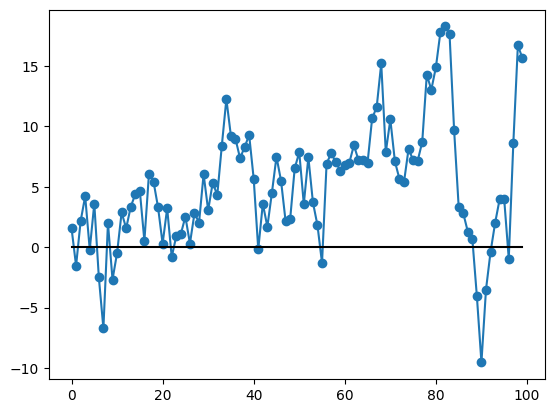

In [ ]:
mu = 5
phi = 0.8

WN = norm.rvs(0, 4, 200)  #simulamos 100 valores de forma aleatoria
Z = []
for i in range(len(WN)-1):
  if i == 0:
    Z.append(WN[i])
  else:
    Z.append(phi*Z[i-1] + WN[i])
Z = Z[99:]  #eliminamos los primeros 100 valores
Z = np.array(Z) + mu

plt.plot(range(len(Z)), Z, '-o')
plt.plot(range(len(Z)), np.linspace(0,0,len(Z)), color='black')

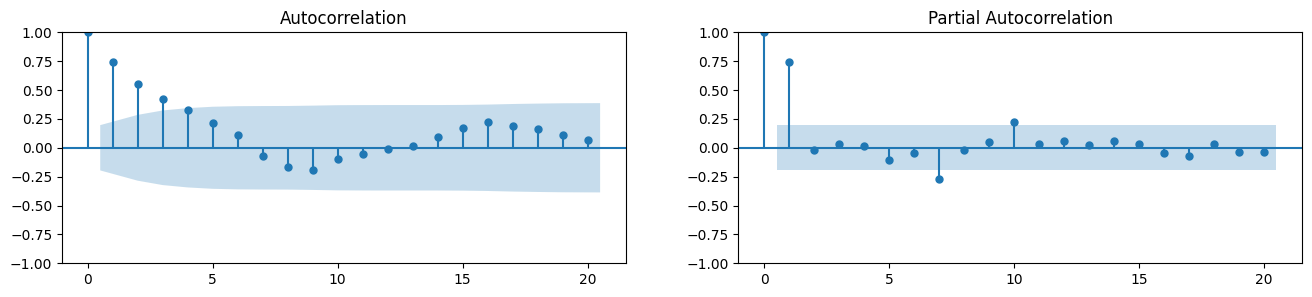

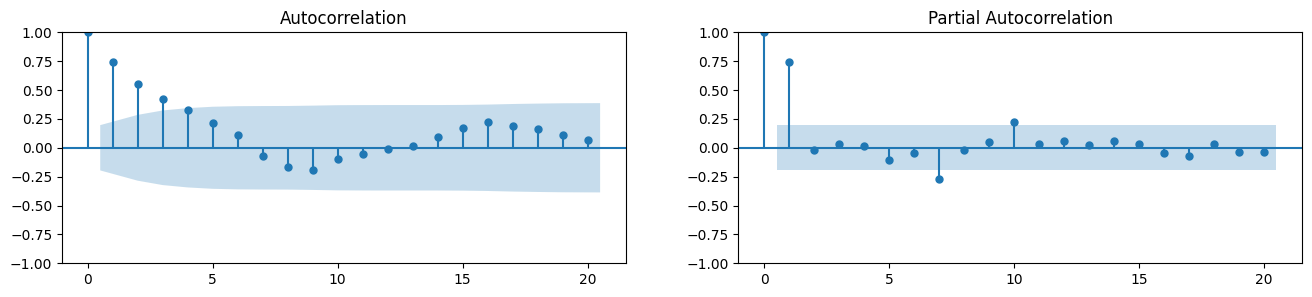

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(Z, lags=20, ax=axes[0])
plot_pacf(Z, lags=20, ax=axes[1])

  <p align="justify">
Caracterisiticas generales de los modelos $AR(p)$:<br><br>
1. Dado $ Z_t = \mu + \phi_1 Z_{t-1} + \phi_2 Z_{t-2} + ... + \phi_p Z_{t-p} + A_t$, para que el proceso sea estacionario se debe cumplir que las soluciones a la ecuación polinomial:<br><br>
$$ 1 - \phi_1 x - \phi_2 x^{2} - ... - \phi_p x^{p} = 0 $$ <br>
sean todas en módulo mayores a 1 (si las raices son reales deben ser mayores a 1 en valor absoluto).<br><br>
2. La función de autocorrelación teórica muestra un acercamiento suave o amortiguado hacia el 0 (de forma monótona o cíclica).<br><br>
3. La función de autocorrelación muere repentinamente en $k=p$.<br><br>
Para finalizar, veremos una caracteristica que cumplen todos los procesos $AR(p)$ mediante el mismo ejemplo visto del proceso $AR(1)$. Dijimos que el proceso $AR(1)$ viene dado por:<br><br>
$$ Z_t = \mu + \phi Z_{t-1} + A_t $$<br>
De igual forma se cumple que:<br><br>
$$ Z_{t-1} = \mu + \phi Z_{t-2} + A_{t-1} $$<br>
Reemplazando en la ecuación anterior:<br><br>
$$ Z_{t} = \mu (1 + \phi) + \phi^2 Z_{t-2} + A_t + \phi A_{t-1}$$<br>
Reemplazando nuevamente $Z_{t-2}$:<br><br>
$$ Z_{t} = \mu (1 + \phi + \phi^2) + \phi^3 Z_{t-3} + A_t + \phi A_{t-1} + \phi^2 A_{t-2}$$<br>
De esta forma podemos seguir indefinidamente, de forma tal que:<br><br>
$$ Z_{t} = \frac{ \mu }{ 1 - \phi} + \sum_{k=0}^{\infty}\phi^k A_{t-k} $$<br>
Esta última expresión se conoce como representación $MA(\infty)$ (de medias móviles infinito) del proceso $AR(1)$. Todo proceso autorregresivo (estacionario) puede ser representado como un proceso de medias móviles infinito.



</p>

 # **<font color="DeepPink">Procesos de medias móviles $(MA)$</font>**

  <p align="justify">
El tercer tipo de procesos estacionarios que vamos a estudiar son los procesos de medias móviles.<br><br>
<strong>Definición</strong><br><br>
Decimos que la serie $Z_t$ sigue un proceso $MA(q)$ si se puede escribir de la forma:<br><br>
$$ Z_t = \mu + A_t + \theta_1 A_{t-1} + \theta_2 A_{t-2} + ... + \theta_q A_{t-q}  $$<br>
con $ A_t, A_{t-1},..,A_{t-q} \sim WN $ y $\theta_1, \theta_2, ..., \theta_q$ números reales con algunas restricciones que iremos estudiando.<br><br>
Empecemos por el proceso $MA(1)$, es decir:<br><br>
$$ Z_t = \mu + A_t + \theta A_{t-1} $$<br>
Intuitivamente, el proceso $MA(1)$ nos dice que el resultado de la serie en cada momento $t$ viene dado por un shock aleatorio propio del momento y un efecto residual del shock ocurrido en el momento anterior. Cada shock impacta en el momento en el que ocurre de forma directa y en el momento siguiente a través de $\theta$, luego desaparece de forma repentina.<br><br>
Este proceso es estacionario por construcción para cualquier valor que tome $\theta$:<br><br>
$$ E[Z_t] = E[\mu] + E[A_t] + \theta E[A_{t-1}] = \mu \quad \forall t$$<br>
$$\text{var}(Z_t) = \text{var}(\mu) + \text{var}(A_t) + \theta^2 \text{var}(A_{t-1}) = \sigma^2_A + \theta^2 \sigma^2_A = \sigma^2_A(1 + \theta^2) \quad \forall t$$<br><br>
Se puede demostrar que las funciones teóricas de autocorrelación y autocorrelación parcial vienen dadas por:<br><br>
$$  \rho_k = \begin{cases} \frac{ \theta }{ 1+\theta^2 } \text{ si } k=1 \\ 0 \text{ si } k>1 \end{cases} \quad \text{función de autocorrelación} $$<br>
$$ \pi_k = \frac{-(-\theta)^k}{1+\theta^2 + \theta^4 + ... + \theta^{2k}} \quad \text{función de autocorrelación parcial} $$<br>
Para este proceso, esperamos ver que la función de autocorrelación muera repentinamente en $k=1$ y que la función de autocorrelación parcial decaiga lentamente (en valor absoluto) acercandose a 0 a medida que $k$ aumenta.
Veamos dos ejemplos simulados.


</p>

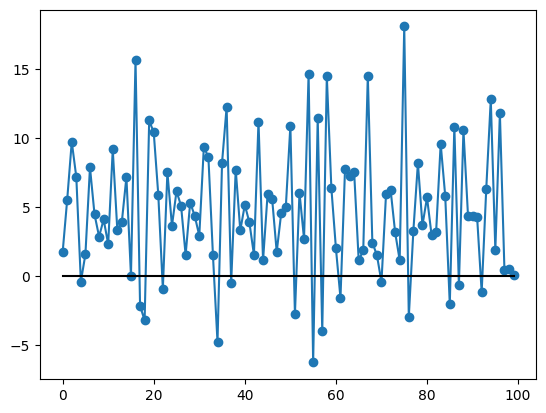

In [ ]:
mu = 5
theta = -0.8

WN = norm.rvs(0, 4, 200)  #simulamos 100 valores de forma aleatoria
Z = []
for i in range(len(WN)-1):
  if i == 0:
    Z.append(WN[i])
  else:
    Z.append(WN[i] + theta*WN[i-1])

Z = Z[99:]  #eliminamos los primeros 100 valores
Z = np.array(Z) + mu

plt.plot(range(len(Z)), Z, '-o')
plt.plot(range(len(Z)), np.linspace(0,0,len(Z)), color='black')

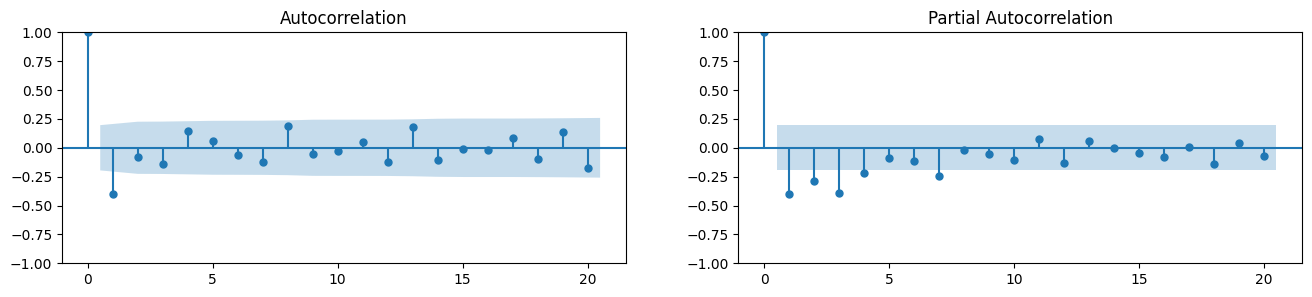

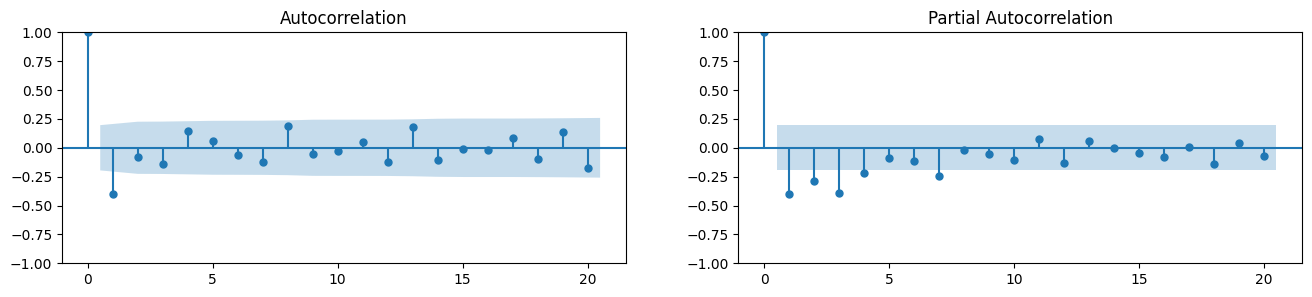

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(Z, lags=20, ax=axes[0])
plot_pacf(Z, lags=20, ax=axes[1])

<p align="justify">
Caracterisiticas generales de los modelos $MA(q)$:<br><br>
 Dado $ Z_t = \mu + A_t + \theta_1 A_{t-1} + \theta_2 A_{t-2} + ... + \theta_q A_{t-q} $:<br><br>
1. La función de autocorrelación teórica muere repentinamente en $k=q$<br><br>
2. La función de autocorrelación parcial teórica muestra un acercamiento suave o amortiguado hacia el 0 (de forma monótona o cíclica).<br><br>
3. Así como los procesos $AR$ tiene una representación $MA(\infty)$, los procesos $MA$ pueden tener una representación como $AR(\infty)$. Cuando esto ocurre decimos que el proceso $MA$ es invertible. Para que esto ocurra, las raíces de la siguiente ecuación polinómica:<br><br>
$$ 1 + \theta_1 x + \theta_2 x^{2} + ... + \theta_q x^{q} = 0 $$<br>
deben ser todas en módulo mayores a 1.<br><br>
<strong>Nota:</strong> en la literatura de ecuaciones en diferencias se suelen expresar las ecuaciones caracteristicas con los exponentes ordendados de manera inversa. De ser este el caso, las raices de las ecuaciones planteadas deben ser todas en modulo menores a 1.



</p>

# **<font color="DeepPink">Procesos $ARMA(p;q)$: identificación y estimación</font>**

  <p align="justify">
Es posible estudiar de forma teórica procesos que son una mezcla entre procesos $AR$ y procesos $MA$, estos procesos se denominan procesos $ARMA(p;q)$. Por ejemplo, un proceso $ARMA(2,1)$ vendría dado por:<br><br>
$$ Z_t = \mu + \phi_1 Z_{t-1} + \phi Z_{t-2} + A_t + \theta_1 A_{t-1} $$<br><br>
Para que estos procesos sean estacionarios e invertibles las ecuaciones características vinculas a las partes $AR$ y $MA$ deben presentar raices que sean todas en módulo mayores a 1.<br><br>
Este tipo de procesos presenta funciones de autocorrelación y autocorrelación parcial teóricas que muestran acercamiento suave hacia el 0. Esto dificulta la identificación del proceso mediante el uso de las funciones de autocorrelación y autocorrelación parcial muestrales. Más aún, hemos dicho que los procesos $AR$ pueden representarse como $MA(\infty)$ y los procesos $MA$ como $AR(\infty)$. Esto quiere decir que dado un proceso $ARMA(p,q)$ podemos estimarlo como un proceso $AR$ o $MA$ con una gran cantidad de rezagos con resultados que parecen funcionar muy bien, ajustando los datos y produciendo residuos que son $WN$.<br><br>
Veamos una aplicación práctica.


</p>

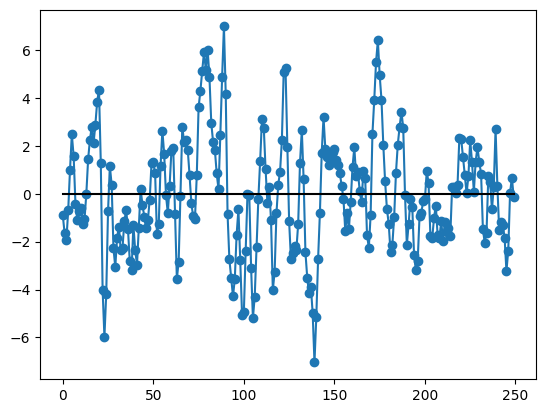

In [ ]:
Z = [-0.8918276432634077, -1.6320083331826887, -1.9252835090407818, -0.6913018533051596, 1.002419663754798, 2.474040382422317, 1.5754407144350153, -0.40865356296664623, -1.092621620872425, -0.7323813401891128, -0.5813060407843137, -1.2502246934055776, -1.0725098539280322, -0.015398687499943331, 1.4373655351097532, 2.258924734934854,
 2.796637547147611, 2.1084610019949745, 2.886513130416641, 3.8482750502093865, 4.33551295612796, 1.2906107854804076, -4.004367680435024, -5.976447666931979, -4.1783788805043, -0.7156476073021941, 1.1519793849164388, 0.3731332575603551, -2.2780583083541597, -3.0655306513302407, -1.8280923344502054, -1.3764276685542534,
 -2.3674171713261174, -2.2533053708690822, -1.1576315866034308, -0.6744663616411506, -1.4712265362403336, -2.814482088744125, -3.199283706863662, -1.2990982786683896, -2.36408585719962, -2.9585482762276336, -1.4127773495611382, 0.1866399545300027, -0.45468874614273647, -0.9628671166565417, -1.4416000433294651, -1.1047591822353828,
 -0.2501104424604242, 1.2754603042976151, 1.3074493798211675, 0.8471377124305568, -1.6980920841682239, -1.2698250315269093, 1.1595887882639198, 2.636323139182862, 1.6592124378955027, -0.06664683996302034, -0.8034364036992139, 0.33765567753851833, 1.7873095315773107, 1.8994794400776203, -0.8398633855282549, -3.5532135396138234,
 -2.829164646314066, -0.09099643238058486, 2.783624238283988, 2.1777599324417376, 2.235365257164251, 1.8463761209175849, 0.793791170384673, -0.39539949283863507, -0.9464922214783875, -1.0358283435523312, 0.7620079558751132, 3.6106528066479098, 4.292502703985776, 5.135883834583921, 5.909301451844678, 5.168713650969895,
 6.007204219310953, 4.871104803160914, 2.9633932751811725, 2.1661571717376633, 1.8298164435169044, 0.8473873176101852, 0.19103894805351496, 2.4362861189068523, 4.88057712619453, 6.982717765378681, 4.143499474404095, -0.8573579296227327, -2.726279437738713, -3.531368753595107, -4.288766259609707, -3.5536466671399682,
 -1.7061471974984332, -0.6494341639422079, -2.7634343892540327, -5.048238453684538, -4.939643131595817, -2.3811203409131654, -0.014436255574919121, -0.06372226372549805, -3.083324212669032, -5.188702232826584, -4.2970182632480585, -2.2137833772368882, -0.21852515876776746, 1.3785338393537743, 3.110365239023798, 2.7613617553931804,
 1.014176307911594, -0.38022273382038957, 0.2901980390017851, -1.1055543066317464, -4.014878942020082, -3.2558344254781684, -0.8124312012644377, 0.3820722462820413, 0.9271044657725966, 2.2523151323694783, 5.09958331907303, 5.24542208886645, 1.9694143076605048, -1.1494078427986159, -2.7287326682632926, -2.4862190733273843,
 -2.195060178445308, -2.3421651421837217, -1.2522475761892862, 1.2900804002227424, 2.663117856840652, 0.603444467326218, -2.444973414836981, -3.501737455304396, -4.162775164729009, -3.8773570871512253,
 -4.989540405738662, -7.043152378326049, -5.151462275131645, -2.7115294525424543, -0.7828710219232887, 1.7106581661745064, 3.1982064805051227, 1.8509282026309284, 1.553179058478512, 1.2007887029285214, 1.4313914638113732, 1.7222079399476007, 1.886773112011335, 1.4277375998515531, 1.1991834068467744, 0.8628665931327482,
 0.32333069555603366, -0.20483662019619664, -1.554423545025723, -0.8134889852473359, -1.4898761561062055, -0.3329298549236632, 1.1192437492347416, 1.9338475945438869, 0.7282516880392912, 0.9037257621629338, 0.09704528564263959, -0.34561357211162536, 0.9483457274901992, 0.6675672558551224, -1.7013717917809492, -2.2577943253782156,
 -0.9007256946356417, 2.4972895515248994, 3.9111411656362827, 5.496102381885682, 6.406943868813008, 4.944930235450438, 3.928379305478866, 2.048675335023254, 0.5119950756675113, -0.6281625115626539,
 -1.2603747370365925, -2.4433324795357843, -2.1377258466238316, -0.9681942147293346, 0.8782419359971696, 2.052921821110736, 2.7851434071337025, 3.427466592789035, 2.765064718391702, -0.06081387962592055, -2.1322819343383705, -1.2654704755832904,
 -0.21209938241056103, -0.5358903528292085, -2.5764422302925727, -3.1915704301662164, -2.8094209936348418, -0.9476801791280131, -0.7992215830485099, -0.311936187525941, -0.2181641371732791, 0.9530822020220704, 0.44310795306159223, -1.7427977364187555, -1.8651110361621213,
 -1.0197832695588847, -0.4916418458530984, -1.736817583972331, -1.8333084228875909, -1.1395581676999762, -1.9849578445695149, -1.1681473803849085, -1.6000992218508299, -1.4408803501216103, -1.761180543484691, 0.27519336325822663,
 0.2732189725767964, 0.038992635456046726, 0.37712625376901976, 2.320904771941416, 2.295105762442947, 1.5167560165035527, 0.7841550326593789, 0.011069970798790407, 0.7367385931656422, 2.2360946530160026, 1.3184919636856105, 0.07850589190044589,
 1.3436822868162026, 1.9449709103210768, 1.3357982731751508, 0.8324125538264111, -1.4624480142688296, -2.0511514242149445, -1.6208684817398604, 0.7249007050159689, 0.5011667524000443, -0.6475951340478224, 0.26836114660733923, 2.706430377240319,
 0.32437497861486175, -1.5334058655726195, -1.1680851136868424, -1.3034009534722717, -1.8521992471012703, -3.225504057947278, -2.3759564455019486, 0.036656173349891574, 0.6708513862881682, -0.12668007834798212]
plt.plot(range(len(Z)), Z, '-o')
plt.plot(range(len(Z)), np.linspace(0,0,250), color='black')

¿Es esta serie estacionara? A simple vista se observa que la series se mueve al rededor de un valor constante (su media) y que la variabilidad de los datos no cambia en el tiempo. Parece ser estacionaria.

El primer paso para estimar el modelo es remover la media a los datos. En este caso la media parece ser 0 (y de hecho lo es por lo que no es necesario removerla).

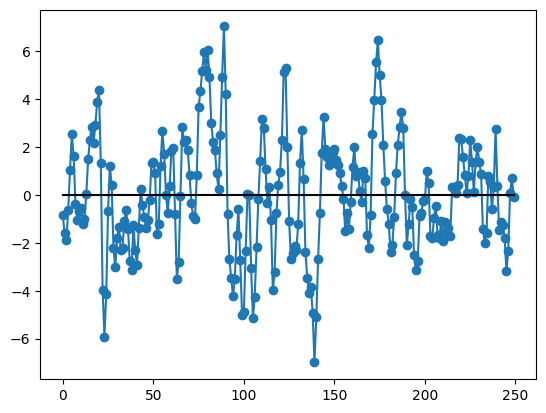

In [ ]:
np.mean(Z)
Z = np.array(Z) - np.mean(Z)
plt.plot(range(len(Z)), Z, '-o')
plt.plot(range(len(Z)), np.linspace(0,0,250), color='black')

Grafiquemos ahora las funciones de autocorrelación y autocorrelación parcial muestrales y veamos si se comportan como lo harían las funciones teóricas de un proceso estacionario.

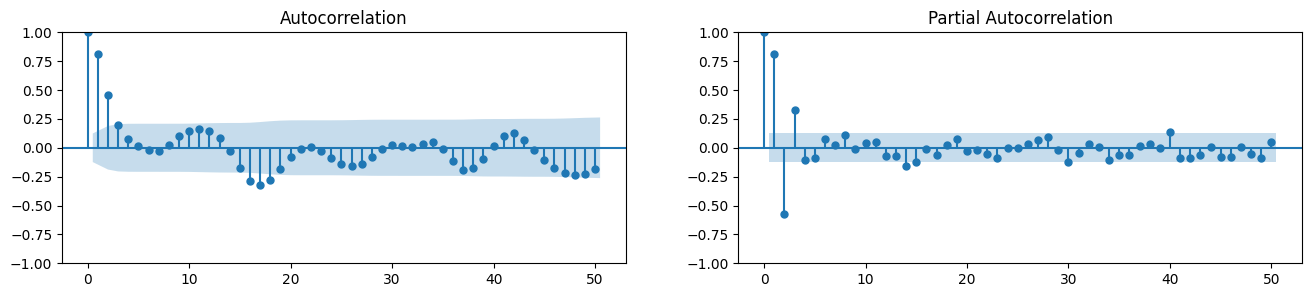

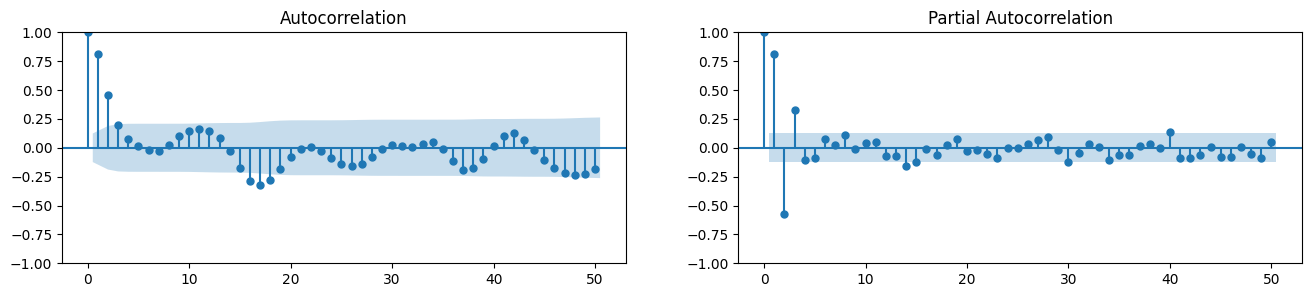

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(Z, lags=50, ax=axes[0])
plot_pacf(Z, lags=50, ax=axes[1])


  <p align="justify">Ambas funciones muestran un acercamiento relativamente suave hacia el 0. La función de autocorrelación muestral presenta algunos valores significativamente distintos de 0 para $k=16,17,18$ que podrían considerarse raros. En principio, la función de autocorrelación presenta valores significativos hasta el lag 2 y la de autocorrelación parcial hasta el lag 3. En general la función de autocorrelación nos ayuda a identificar la cantidad de lags en la parte $MA$ y la función de autocorrelación parcial la cantidad de lags de la parte $AR$.<br><br>
Esto nos hace sospechar que el proceso podría ser un $ARMA(3,2)$ pero deberiamos probar otros procesos cercanos también, $ARMA(3,1)$, $ARMA(3,3)$, $ARMA(2,2)$, $ARMA(4,2)$, $ARMA(2,1)$, $ARMA(4,3)$.<br><br>
La forma más de estimación consiste en empezar estimando un $AR(1)$ y luego ir agregando lags autorregresivos hasta que el último coeficiente estimado sea no significativamente distinto de 0. Luego se hace los mismo con la parte $MA$ empezando con un $MA(1)$. Finalmente se estiman todas modelos $ARMA(p,q)$ posibles con lags autorregresivos menores al máximo encontrado al estimar modelos $AR$ unicamente y con lags de medias móviles menores al máximo encontrado al estimar modelos $MA$ unicamente. Ejemplo, si estimamos como máximo un $AR(6)$ y un $MA(5)$ tenemos que estimar todos los modelos $ARMA$ con menos de 7 lags autorregresivos y menos de 6 lags de medias móviles.<br><br>
Los procesos de estimación se realizan, en general, por máxima verosimilitud de forma iterativa. Son complejos, por lo que no veremos los detalles matemáticos aquí.<br><br>
En principio nos quedaremos con aquellos modelos capaces de producir reciduos $WN$ y entre ellos elegiremos aquel que tenga menor criterio de información de Akaike o criterio de Información de Schwarz. Estos criterios, para cada modelo, ponderan positivamente que tan bueno es el ajuste de los datos y negativamente la cantidad de parámetros estimados.

In [ ]:
#Ajustamos un modelo para y obtenemos los coeficientes AR y MA
model = sm.tsa.ARIMA(Z, order=(2, 0, 2)).fit()
model.polynomial_ar, model.polynomial_ma

(array([ 1.        , -0.55609291,  0.07532612]),
 array([1.        , 0.93795333, 0.40660755]))

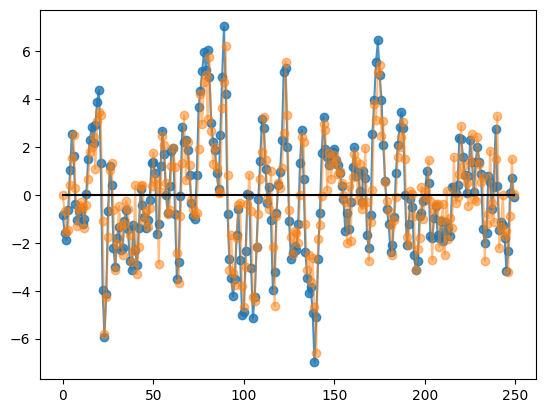

In [ ]:
predict = model.predict()
plt.plot(range(len(Z)), Z, '-o', alpha=0.8)
plt.plot(range(len(Z)), predict, '-o', alpha=0.5)
plt.plot(range(len(Z)), np.linspace(0,0,250), color='black')

In [ ]:
A = np.array(Z) - predict
sm.stats.acorr_ljungbox(A, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,21.837233,0.349408


<p align="justify">No se rechaza la hipótesis nula que los residuos del modelo son $WN$. Nos resta entonces calcular los criterios de información de Akaike y/o Schwarz. Aquí utilizaremos el criterio de información de Akaike:<br><br>
$$ AIC = -2 \log (Verosimilitud) +  2k $$ <br>
donde $k$ representa la cantidad de parámetros estimados del modelo. Dado que queremos elegir el modelo con menor $AIC$, el primer término premia el ajuste, mientras mejor ajusten los datos mayor será la verosimilitud, mientras que el segundo término penaliza la cantidad de parámetros uitilizados.

In [ ]:
model.aic

763.5879097847566

In [ ]:
model1 = sm.tsa.ARIMA(Z, order=(1, 0, 2)).fit()
predict1 = model.predict()
A1 = np.array(Z) - predict1
lb = sm.stats.acorr_ljungbox(A1, lags=[20], return_df=True)['lb_pvalue']
(lb>0.05) , model1.aic<model.aic


(20    True
 Name: lb_pvalue, dtype: bool,
 True)

In [ ]:
model = sm.tsa.ARIMA(Z, order=(1, 0, 2)).fit()
model.polynomial_ar, model.polynomial_ma

(array([ 1.       , -0.4686253]), array([1.        , 1.02093888, 0.45490829]))

<p align="justify">Nuestro modelo estimado es:<br><br>
$$ Z_t = -0.47 Z_{t-1} + A_t + 1.021 A_{t-1} + 0.455A_{t-2} $$<br>
Con el modelo estimado, podemos hacer predicciones dado que conocemos toda la historia de la serie hasta $t=250$. Podemos calcular el valor esperado que tomara la serie en los momentos $251, 252, 253,...$ dado lo que sabemos hasta el momento actual. Para esto, debemos notar que tenemos estimaciones de los residuos para todos los momentos hasta $t=250$. Por lo tanto:<br><br>
$$ \hat{Z}_{251} = E_{250}[Z_{251}] = -0.47 Z_{250} + E_{250}[A_{251}] + 1.021 \hat{A}_{250} + 0.455 \hat{A}_{249}  $$<br>
Como $E_{250}[A_{251}]=0$ se cumple que:<br><br>
$$ \hat{Z}_{251} =  -0.47 Z_{250} + 1.021 \hat{A}_{250} + 0.455 \hat{A}_{249}  $$<br>
Podemos seguir haciendo estimaciones de valores futuros de $Z$ utilizando las estimaciones ya hechas:<br><br>
$$ \hat{Z}_{252} =  -0.47 \hat{Z}_{251} + 1.021 E_{250}[A_{251}] + 0.455 \hat{A}_{250} \\ = -0.47 \hat{Z}_{251} + 0.455 \hat{A}_{250}  $$<br>
A partir de $t=253$ la parte $MA$ desaparece en las predicciones:<br><br>
$$ \hat{Z}_{250+ s} =  -0.47 \hat{Z}_{250 + s -1} \quad \forall s\geq3  $$


In [ ]:
predict = model1.predict()

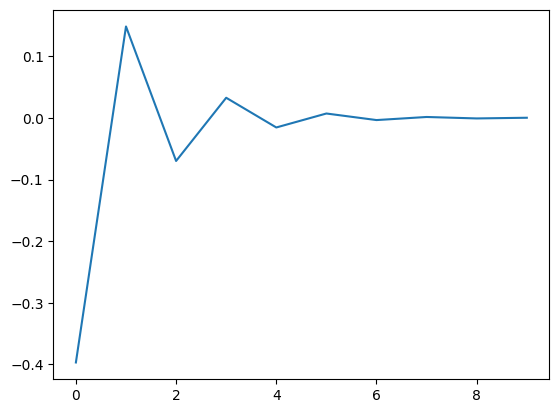

In [ ]:
#Realizamos n predicciones futuras

n=10
A = np.array(Z) - predict
forecast = []
for i in range(n):
  if i == 0:
    zpred = -0.47*Z[249] + 1.021*A[249] + 0.455*A[248]
    forecast.append(zpred)
  elif i == 1:
    zpred = -0.47*forecast[0] + 0.455*A[249]
    forecast.append(zpred)
  else:
    zpred = -0.47*forecast[i-1]
    forecast.append(zpred)

plt.plot(forecast)

Para finalizar solo vamos a mencionar que es posible construir intervalos para los valores estimados en base al error cuadrático medio de cada estimación (más bien a la raiz cuadrada del $ECM$).

In [ ]:
#Proceso simulado
arparams = np.array([-.75, .25])
maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)
Z = arma_process.generate_sample(250)
arma_process.isstationary, arma_process.isinvertible

(True, True)

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
